# Изучение закономерностей, определяющих успешность игр

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Приведем название столбцов к нижнему регистру

In [4]:
df.columns=df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Данные имеют объем в 16714 и 11 столбцов.В данных также имеются пропуски, в основном в столбцах user_score, 
critic_score и rating. Скорее всего их пропустили не случайно а просто оценки для данных игр не были проставлены.
Также видим что тип данных в user_score object. Его нужно применить для последующего исследования
Также можно изменить тип данных в 'int' в столбце year_of_release. В этом столбце как и в данных 'name'
небольшое количество пропусков, которые скорее всего вызваны человеческим фактором

Посчитаем сумму пропусков в каждом столбце:

In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<AxesSubplot:>

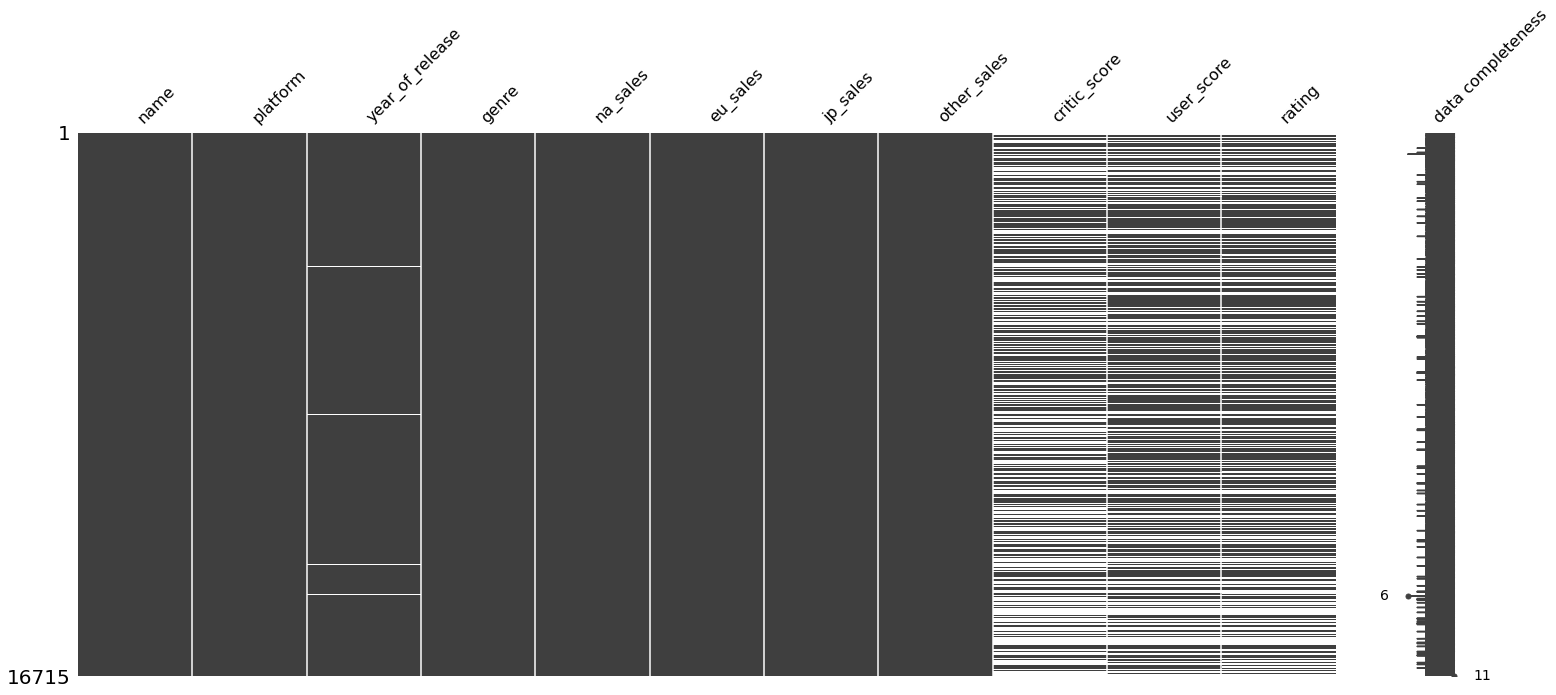

In [7]:
! pip install missingno
import missingno as msno

msno.matrix(df, labels=True)



<AxesSubplot:>

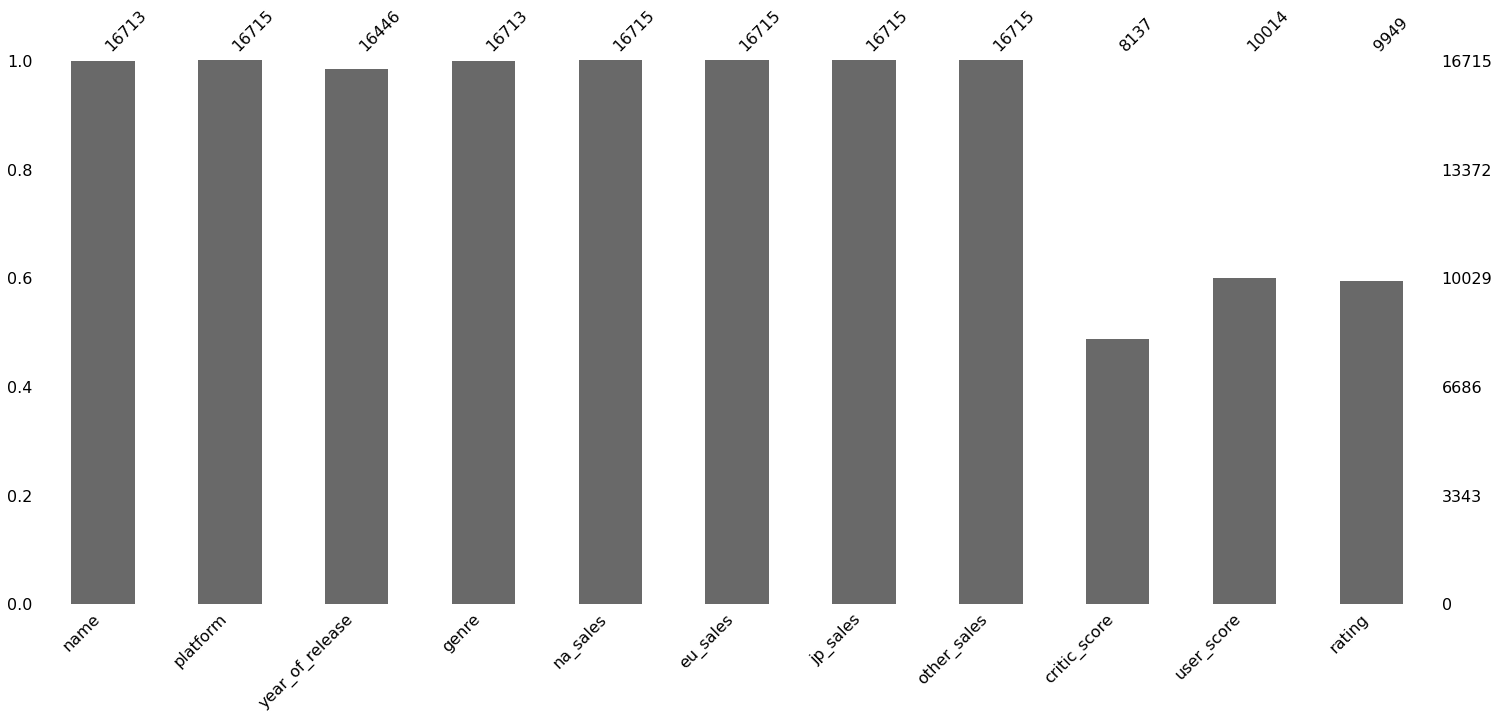

In [8]:
msno.bar(df)

Как и описывал в выводе выше можно видеть что больше всего пропусков в столбцах user_score, critic_score и rating.

Для начала разберемся со столбцом year_of_release и выясним для каких игр пропущено значение в этом столбце

In [9]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df= df.dropna(subset=['year_of_release','name'])

Доля пропусков в столбце year_of_release получилась меньше 2 процентов, а количество в столбце 'name' всего 2.
Поэтому от них избавились

In [11]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [12]:
df.duplicated().sum()

0

Явных дубликатов не обнаружено

У нас имеются пропуски в столбце 'rating' , заполним их на 'Unknown'

In [13]:
df['rating']=df['rating'].fillna('Unknown').copy()

In [14]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

In [15]:
df.loc[(df['user_score'] == 'tbd'), 'user_score'] = df[df.isna()]

In [16]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

В столбце 'user_score' мы заменили параметр 'tbd' на пропуск. Далее пропуски в столбцах critic_score, user_score
оставляем без изменений

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


In [18]:
df['year_of_release']=df['year_of_release'].astype('int') #год выпуска можно перевесть в int

In [19]:
df['user_score']=pd.to_numeric(df['user_score'], errors='coerce') #изменим тип данных в 'user_score'


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


In [21]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']# общее сумма продаж по всем регионам

In [22]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


Вывод: Изменили где нужно тип данных в числовой, удалили пропуски где это возможно, где то их изменили, а где то оставили без изменений
так чтобы не исказить последующий анализ. Предобработка выполнена, можно двигаться дальше

__Шаг 3. Исследовательский анализ данных__

Посмотрим, сколько игр выпускалось в разные годы.

In [23]:
group_year=df.groupby('year_of_release',as_index=False).agg({'name':'count'})
group_year=group_year.sort_values(by='year_of_release', ascending= False)
group_year

,year_of_release,name
36,2016,502
35,2015,606
34,2014,581
33,2013,544
32,2012,653
31,2011,1136
30,2010,1255
29,2009,1426
28,2008,1427
27,2007,1197


Произвел группировку количества игр в зависимости от года. Будем опираться на свежие данные 
и возьмем последние 5 лет для прогноза на 2017 год, тем более что есть сильная разница между 2011 годом
и последующими годами.Будем учитывать данные с 2012 по 2016 год

<AxesSubplot:title={'center':'Количество выпущенных игр в разные годы'}, xlabel='year_of_release'>

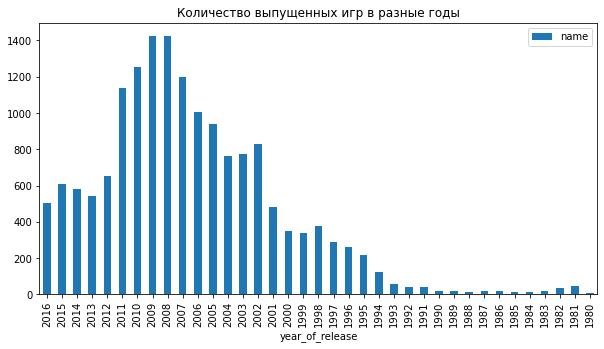

In [24]:
group_year.plot(kind='bar', y='name',x='year_of_release', figsize=(10,5), title='Количество выпущенных игр в разные годы')


Пик приходится с 2005 по 2011 года

Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы

In [25]:
group_platform=df.groupby('platform').agg({'total_sales':'sum'})
group_platform.sort_values(by='total_sales', ascending= False).head(10)


,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Возьмем для анализа первые 6 платформ как самые топовые по продажам

<AxesSubplot:title={'center':'Сумма продаж платформ'}, xlabel='platform'>

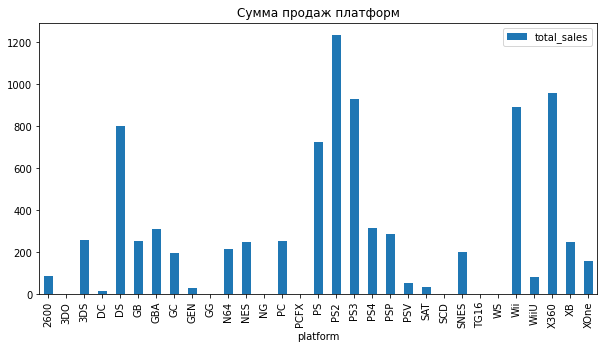

In [26]:
group_platform.plot(kind='bar', y='total_sales', figsize=(10,5), title='Сумма продаж платформ')

Возьмем платформы PS2, X360, PS3, Wii, DS, PS, так как они наиболее выделяются по продажам
и сделаем для них распределение по годам	

Построим столбчатую диаграмму для каждой платформы,зависимость объема продаж от года:

<AxesSubplot:title={'center':'PS2'}, xlabel='year_of_release'>

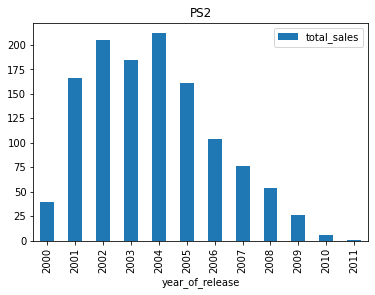

In [27]:
df[df['platform'] == 'PS2'].pivot_table(index=['year_of_release'], values='total_sales', aggfunc=['sum']).plot(kind='bar',y='sum',\
                                                                                                              title='PS2')

<AxesSubplot:title={'center':'X360'}, xlabel='year_of_release'>

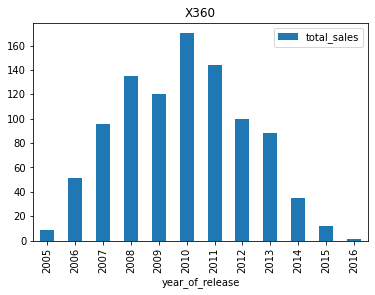

In [28]:
df[df['platform'] == 'X360'].pivot_table(index=['year_of_release'], values='total_sales', aggfunc=['sum']).plot(kind='bar',y='sum',\
                                                                                                              title='X360')

<AxesSubplot:title={'center':'PS3'}, xlabel='year_of_release'>

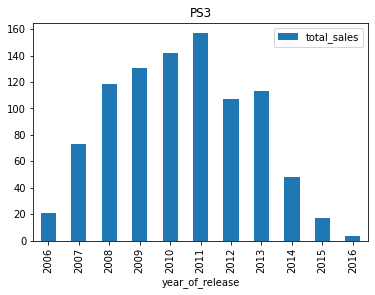

In [29]:
df[df['platform'] == 'PS3'].pivot_table(index=['year_of_release'], values='total_sales', aggfunc=['sum']).plot(kind='bar',y='sum',\
                                                                                                              title='PS3')

<AxesSubplot:title={'center':'Wii'}, xlabel='year_of_release'>

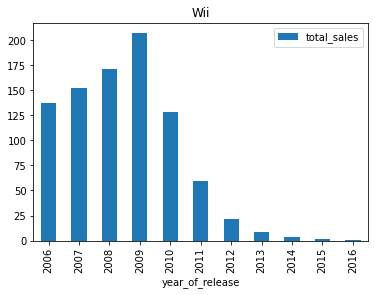

In [30]:
df[df['platform'] == 'Wii'].pivot_table(index=['year_of_release'], values='total_sales', aggfunc=['sum']).plot(kind='bar',y='sum',\
                                                                                                              title='Wii')

<AxesSubplot:title={'center':'DS'}, xlabel='year_of_release'>

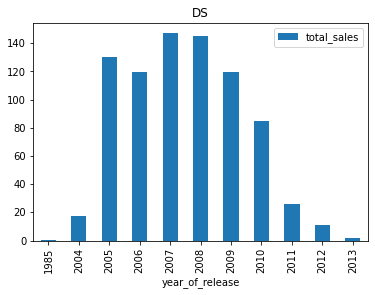

In [31]:
df[df['platform'] == 'DS'].pivot_table(index=['year_of_release'], values='total_sales', aggfunc=['sum']).plot(kind='bar',y='sum',\
                                                                                                              title='DS')

<AxesSubplot:title={'center':'PS'}, xlabel='year_of_release'>

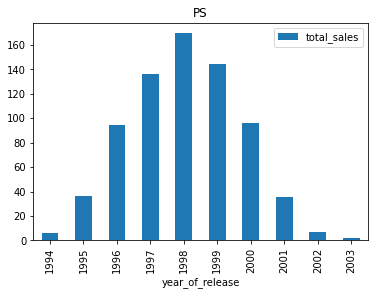

In [32]:
df.query('platform == "PS" ').pivot_table(index=['year_of_release'], values='total_sales', aggfunc=['sum']).plot(kind='bar',y='sum',\
                                                                                                              title='PS')

In [33]:
df_new=df.query('platform in ["PS2","X360","PS3","Wii","PS","DS"]')
df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,Unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


In [34]:
df_new=df_new.pivot_table(index=['platform'],columns='year_of_release', values='total_sales', aggfunc=['sum'])
df_new=df_new.reset_index(drop=False)
df_new

platform   sum                                             \
year_of_release           1985  1994   1995  1996    1997    1998    1999   
0                     DS  0.02   NaN    NaN   NaN     NaN     NaN     NaN   
1                     PS   NaN  6.03  35.96  94.7  136.17  169.49  144.53   
2                    PS2   NaN   NaN    NaN   NaN     NaN     NaN     NaN   
3                    PS3   NaN   NaN    NaN   NaN     NaN     NaN     NaN   
4                    Wii   NaN   NaN    NaN   NaN     NaN     NaN     NaN   
5                   X360   NaN   NaN    NaN   NaN     NaN     NaN     NaN   

                                ...                                          \
year_of_release   2000    2001  ...    2007    2008    2009    2010    2011   
0                  NaN     NaN  ...  146.94  145.31  119.54   85.02   26.18   
1                96.37   35.59  ...     NaN     NaN     NaN     NaN     NaN   
2                39.17  166.43  ...   75.99   53.90   26.40    5.64    0.45   
3                  NaN     NaN  ...   73.19  118.52  130.93  142.17  156.78   
4                  NaN     NaN  ...  152.77  171.32  206.97  127.95   59.65   
5                  NaN     NaN  ...   95.41  135.26  120.29  170.03  143.84   

                                                     
year_of_release    2012    2013   2014   2015  2016  
0                 11.01    1.54    NaN    NaN   NaN  
1                   NaN     NaN    NaN    NaN   NaN  
2                   NaN     NaN    NaN    NaN   NaN  
3                107.36  113.25  47.76  16.82  3.60  
4                 21.71    8.59   3.75   1.14  0.18  
5                 99.74   88.58  34.74  11.96  1.52  

[6 rows x 25 columns]

По данным графиков видно что живучесть платформ где то 8-10 лет, а их наивысшая активность по продажам примерно 4-6 лет.
Но нас интересуют года с 2012 по 2016 для правильной оценки, а эти рассматриваемые платформы уже пошли на спад или
прекратили свое существование

In [35]:
year=2011
df1=df.query('year_of_release > @year') #создал новый датафрейм с интересующими годами , начиная с 2012 года

In [36]:
df1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


In [37]:
group_platform=df1.groupby('platform',as_index=False).agg({'total_sales':'sum'})
group_platform.sort_values(by='total_sales', ascending= False).head(10)



,platform,total_sales
4,PS4,314.14
3,PS3,288.79
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


<AxesSubplot:title={'center':'Сумма продаж платформ за 2012-2016 гг.'}, xlabel='platform'>

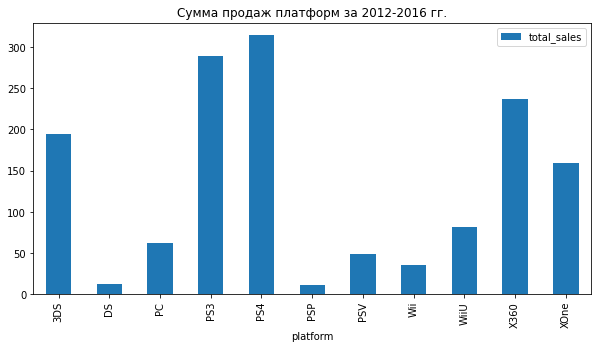

In [38]:
group_platform.plot(kind='bar',x='platform', y='total_sales', figsize=(10,5), title='Сумма продаж платформ за 2012-2016 гг.')
 # Рассмотрим только актуальный период с 2012 года по 2016

Выделяются 5 платформ лидеров по объему продаж на рынке за за последние 5 лет.
Это PS4, PS3, X360, 3DS, XOne , Рассмотрим каждую из них в динамики по годам	

<AxesSubplot:title={'center':'PS4'}, xlabel='year_of_release'>

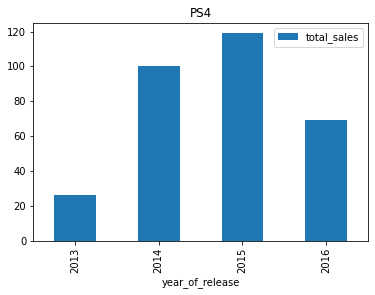

In [39]:
df1[df1['platform'] == 'PS4'].pivot_table(index=['year_of_release'], values='total_sales', aggfunc=['sum'])\
.plot(kind='bar',y='sum',title='PS4')

<AxesSubplot:title={'center':'PS3'}, xlabel='year_of_release'>

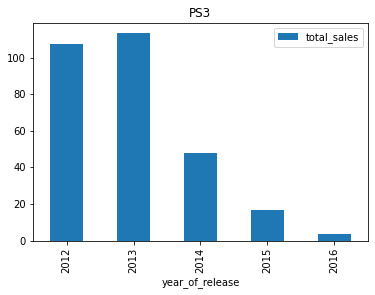

In [40]:
df1[df1['platform'] == 'PS3'].pivot_table(index=['year_of_release'], values='total_sales', aggfunc=['sum'])\
.plot(kind='bar',y='sum',title='PS3')

<AxesSubplot:title={'center':'X360'}, xlabel='year_of_release'>

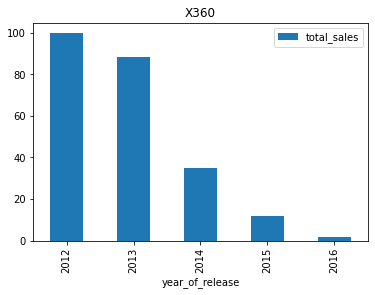

In [41]:
df1[df1['platform'] == 'X360'].pivot_table(index=['year_of_release'], values='total_sales', aggfunc=['sum'])\
.plot(kind='bar',y='sum',title='X360')

<AxesSubplot:title={'center':'3DS'}, xlabel='year_of_release'>

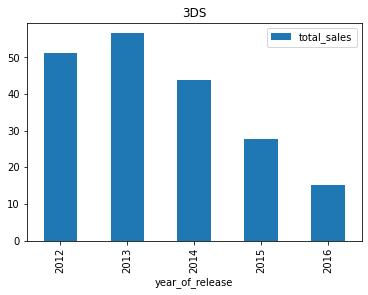

In [42]:
df1[df1['platform'] == '3DS'].pivot_table(index=['year_of_release'], values='total_sales', aggfunc=['sum'])\
.plot(kind='bar',y='sum',title='3DS')

<AxesSubplot:title={'center':'XOne'}, xlabel='year_of_release'>

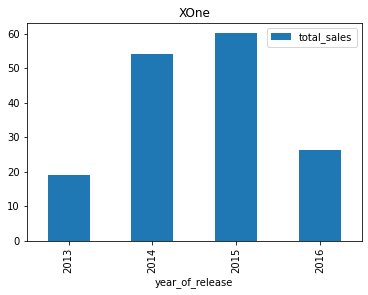

In [43]:
df1[df1['platform'] == 'XOne'].pivot_table(index=['year_of_release'], values='total_sales', aggfunc=['sum'])\
.plot(kind='bar',y='sum',title='XOne')

Как видно из графиков, платформы PS3 и X360 резко сдали позиции в последнии годы и динамика очень плохая
Наиболее стабильные платформы в последние годы это PS4,3DS и XOne. Их и можно считать потенциально прибыльными
В последующем будем опираться на эти три платфоры в период  с 2012 по 2016 гг.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат.

Text(0.5, 1.0, 'График boxplot для платформ')

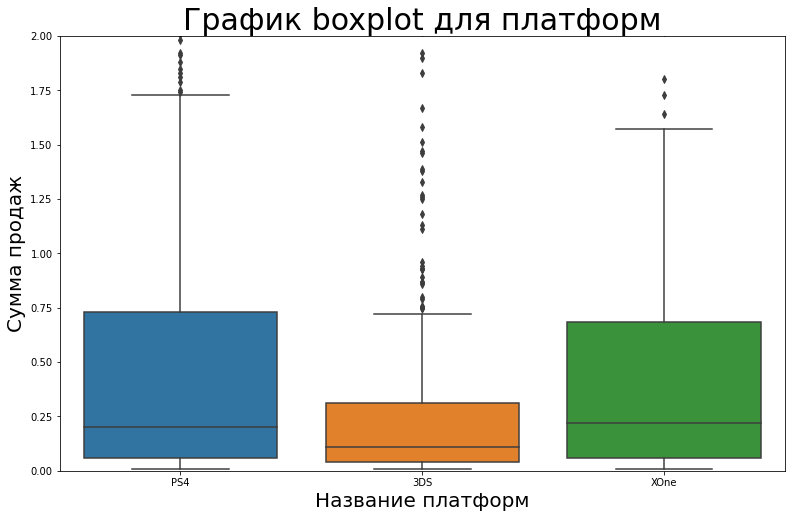

In [44]:
plt.figure(figsize=(13, 8))
plt.ylim(0,2)
df1=df1.query('platform in ["PS4","3DS","XOne"]')
sns.boxplot(data=df1, x="platform", y="total_sales")
plt.xlabel( "Название платформ" , size = 20 )
plt.ylabel( "Сумма продаж" , size = 20 )
plt.title( "График boxplot для платформ" , size = 30 )

Можно сказать что распределение продаж на платформах PS4 и XOne примерно одинаковое по сравнению с платформой 3DS.У платформы 3DS распределение значений более плотное и третий квартиль расположен ближе к медиане и почти в 2 раза меньше чем у платформ PS4 и XOne . Медианное значение меньше чем у платформ PS4 и XOne.Также более подробные значения можем видеть из описательной статистики по каждой платформе в столбце 'total_sales'

In [45]:
df1.query('platform=="3DS" ').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,396.000000,396.000000,396.000000,396.000000,396.000000,104.000000,114.000000,396.000000
mean,2013.750000,0.139672,0.107677,0.221692,0.022399,69.817308,7.033333,0.491439
std,1.339044,0.491059,0.389226,0.558128,0.078660,12.034549,1.482265,1.387161
min,2012.000000,0.000000,0.000000,0.000000,0.000000,26.000000,2.400000,0.010000
25%,2013.000000,0.000000,0.000000,0.010000,0.000000,63.750000,6.300000,0.040000
50%,2014.000000,0.000000,0.000000,0.060000,0.000000,71.000000,7.400000,0.110000
75%,2015.000000,0.090000,0.050000,0.170000,0.010000,78.000000,8.200000,0.312500
max,2016.000000,5.280000,4.190000,4.390000,0.780000,92.000000,9.100000,14.600000


In [46]:
df1.query('platform=="PS4" ').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,392.000000,392.000000,392.000000,392.000000,392.000000,252.000000,257.000000,392.000000
mean,2015.145408,0.277398,0.359923,0.040714,0.123342,72.091270,6.748249,0.801378
std,0.868181,0.583723,0.810843,0.069101,0.254825,12.485992,1.459481,1.609456
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2015.000000,0.007500,0.000000,0.000000,0.010000,66.000000,6.100000,0.060000
50%,2015.000000,0.060000,0.080000,0.010000,0.030000,73.000000,7.000000,0.200000
75%,2016.000000,0.260000,0.300000,0.050000,0.110000,80.000000,7.800000,0.730000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,14.630000


In [47]:
df1.query('platform=="XOne" ').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,247.000000,247.000000,247.000000,247.000000,247.000000,169.000000,182.000000,247.000000
mean,2014.951417,0.377004,0.208866,0.001377,0.057773,73.325444,6.521429,0.645020
std,0.952995,0.630618,0.365306,0.005153,0.094221,12.953465,1.380941,1.036139
min,2013.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.600000,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,66.000000,5.800000,0.060000
50%,2015.000000,0.120000,0.070000,0.000000,0.020000,76.000000,6.800000,0.220000
75%,2016.000000,0.385000,0.220000,0.000000,0.060000,82.000000,7.500000,0.685000
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.000000,9.200000,7.390000


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

In [48]:
ps4_corr=df1[['platform','critic_score','user_score','total_sales']]
ps4_corr[ps4_corr['platform'] == 'PS4'].corr() #построил небольшую табличку для PS4. Зависимость объема продаж от оценок
                                               #пользователей и критиков

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Как видно из данных коэфицциент корреляции, то есть зависимость объема продаж от оценок
пользователей отрицательная и почти нулевая. Зависимость от оценок критиков тоже небольшая 0.406
Построим диаграммы рассеивания

<AxesSubplot:title={'center':'PS4 оценки пользователей'}, xlabel='user_score', ylabel='total_sales'>

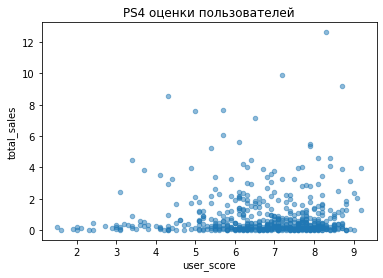

In [49]:
ps4_corr.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5,title='PS4 оценки пользователей') 

<AxesSubplot:title={'center':'PS4 оценки критиков'}, xlabel='critic_score', ylabel='total_sales'>

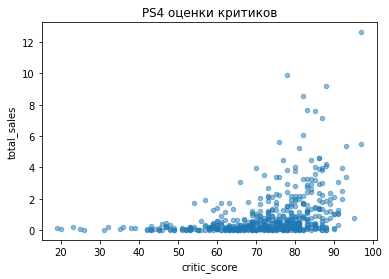

In [50]:
ps4_corr.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5,title='PS4 оценки критиков') 

In [51]:
ds_corr=df1[['platform','critic_score','user_score','total_sales']]
ds_corr[ds_corr['platform'] == '3DS'].corr() #построил небольшую табличку для 3DS. Зависимость объема продаж от оценок
                                               #пользователей и критиков

,critic_score,user_score,total_sales
critic_score,1.000000,0.722762,0.320803
user_score,0.722762,1.000000,0.197583
total_sales,0.320803,0.197583,1.000000


Как видно из данных коэфицциент корреляции, то есть зависимость объема продаж от оценок пользователей небольшая
около 0.2. Зависимость от оценок критиков тоже небольшая 0.32 .Построим диаграммы рассеивания

<AxesSubplot:title={'center':'3DS оценки пользователей'}, xlabel='user_score', ylabel='total_sales'>

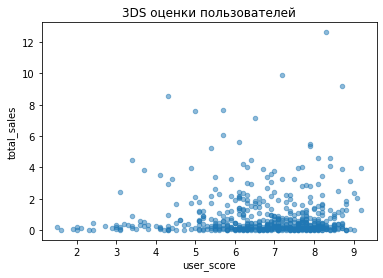

In [52]:
ds_corr.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5,title='3DS оценки пользователей') 

<AxesSubplot:title={'center':'3DS оценки критиков'}, xlabel='critic_score', ylabel='total_sales'>

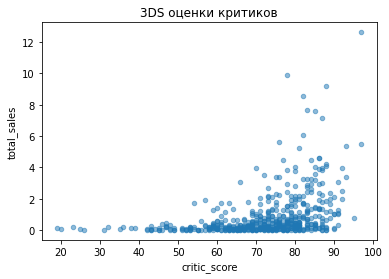

In [53]:
ds_corr.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5,title='3DS оценки критиков')

In [54]:
XOne_corr=df1[['platform','critic_score','user_score','total_sales']]
XOne_corr[XOne_corr['platform'] == 'XOne'].corr() #построил небольшую табличку для XOne. Зависимость объема продаж от оценок
                                               #пользователей и критиков

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


Как видно из данных коэфицциент корреляции, то есть зависимость объема продаж от оценок пользователей отрицательная и около 0. 
Зависимость от оценок критиков тоже небольшая 0.41 .Построим диаграммы рассеивания

<AxesSubplot:title={'center':'XOne оценки пользователей'}, xlabel='user_score', ylabel='total_sales'>

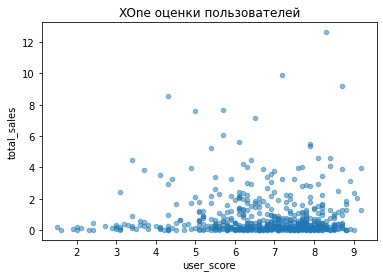

In [55]:
XOne_corr.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5,title='XOne оценки пользователей') 

<AxesSubplot:title={'center':'XOne оценки критиков'}, xlabel='critic_score', ylabel='total_sales'>

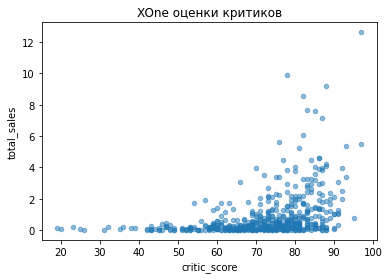

In [56]:
XOne_corr.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5,title='XOne оценки критиков') 

Исходя из данных анализа можно сделать вывод что для трех самых топовых платформ, которые лидируют на рынке в последние 
годы, оценки пользователей и критиков напрямую никак не влияют на объем продаж

__Соотнесем выводы с продажами игр на других платформах.__

In [57]:
df2=df.query('year_of_release > @year') # переменная year=2011,нас интересуют года с 2012

In [58]:
df2['platform']=df2['platform'].where(df2['platform'].isin(["PS4","3DS","XOne"]), 'Другие платформы')

Объединим все остальные платформы в одну группу, чтобы сравнить их с тремя нашими топовыми платформами

In [59]:
df2.platform.unique()

array(['Другие платформы', 'PS4', '3DS', 'XOne'], dtype=object)

In [60]:
other_corr=df2[['platform','critic_score','user_score','total_sales']]
other_corr[other_corr['platform'] == 'Другие платформы'].corr() #построил небольшую табличку для 'Другие платформы'. 
#Зависимость объема продаж от оценок пользователей и критиков

,critic_score,user_score,total_sales
critic_score,1.000000,0.507669,0.266275
user_score,0.507669,1.000000,-0.001886
total_sales,0.266275,-0.001886,1.000000


Как видно из данных коэфицциент корреляции, то есть зависимость объема продаж от оценок пользователей отрицательная и около 0.
Зависимость от оценок критиков тоже небольшая 0.266 .Построим диаграммы рассеивания

<AxesSubplot:title={'center':'Другие платформы оценки пользователей'}, xlabel='user_score', ylabel='total_sales'>

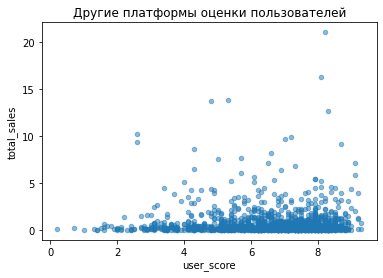

In [61]:
other_corr.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5,title='Другие платформы оценки пользователей') 

<AxesSubplot:title={'center':'Другие платформы оценки критиков'}, xlabel='critic_score', ylabel='total_sales'>

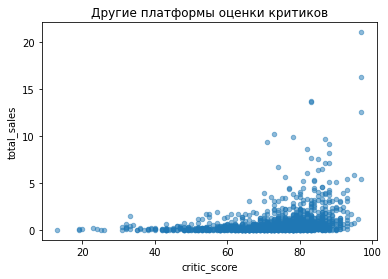

In [62]:
other_corr.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5,title='Другие платформы оценки критиков') 

Если сравнивать все остальные платформы с нашими топовыми то ситуация примерно такая же,
зависимость от оценок критиков небольшая а от оценок пользователей еще меньше

__Посмотрим на общее распределение игр по жанрам.__ 

Здесь мы рассматриваем года с 2012 по 2016

In [63]:
group_genre=df2.groupby('genre',as_index=False).agg({'total_sales':'median'})\
.sort_values(by='total_sales',ascending=False)\
.reset_index(drop=True)
group_genre

,genre,total_sales
0,Shooter,0.440
1,Sports,0.240
2,Platform,0.210
3,Role-Playing,0.140
4,Racing,0.140
5,Fighting,0.130
6,Action,0.120
7,Misc,0.120
8,Simulation,0.120
9,Strategy,0.080


<AxesSubplot:title={'center':'Медианные значения суммы продаж по жанрам'}, xlabel='genre'>

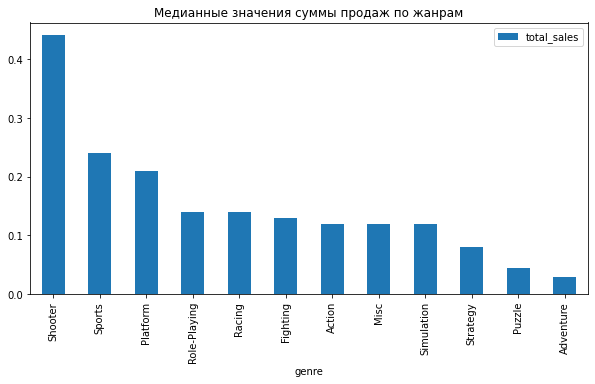

In [64]:
group_genre.plot(kind='bar', y='total_sales', x='genre',figsize=(10,5), title='Медианные значения суммы продаж по жанрам')

__Вывод:__ Самые популярные жанры за последние годы,если смотреть медианные
значения это Shooter, Sports и Platform. Жанр Action, который был на первой строчке по общей сумме продаж
по медианным значениям занимает только 7 строчку

__Шаг 4.__ Составим портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишим различия в долях продаж.
Самые популярные жанры (топ-5).

Для начала разберем регион NA

In [65]:
list = ["X360","PS4","PS3","XOne","3DS"]
df3=df.query('year_of_release > @year') # year=2011, чтобы взять актуальный период
na_platform=df3.groupby('platform',as_index=False).agg({'na_sales':'sum'})\
.sort_values(by='na_sales',ascending=False)\
.reset_index(drop=True)
na_platform=na_platform.query('platform in @list')
na_platform

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


Text(0.5, 1.0, 'Топ 5 платформ Северная Америка')

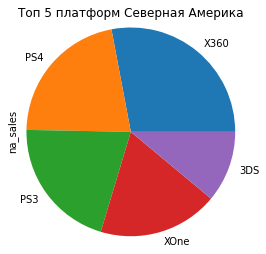

In [66]:
na_platform.plot(kind='pie', y='na_sales', labels=na_platform['platform'],radius=1.2,legend=False)
plt.title('Топ 5 платформ Северная Америка')

Вот нашли топ 5 платформ, X360, PS4, PS3, XOne, 3DS. Первые 4 выделяются в большей степени. Последняя 3DS отстает

In [67]:
na_genre=df3.groupby('genre',as_index=False).agg({'na_sales':'sum'})\
.sort_values(by='na_sales',ascending=False)\
.reset_index(drop=True)
na_genre=na_genre.query('genre in ["Action","Shooter","Sports","Role-Playing","Misc"]')
na_genre

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


Text(0.5, 1.0, 'Топ 5 жанров Северная Америка')

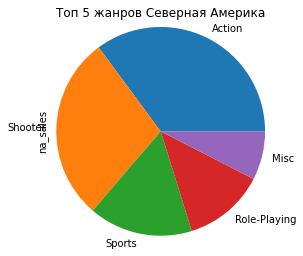

In [68]:
na_genre.plot(kind='pie', y='na_sales', labels=na_genre['genre'],radius=1.2,legend=False)
plt.title('Топ 5 жанров Северная Америка')

Топ 5 жанров для NA это Action, Shooter, Sports, Role-Playing, Misc. Первые два жанра 
выделяются в большей степени, Misc отстает

In [69]:
df3.pivot_table(index = 'platform',  values = ['na_sales','jp_sales','eu_sales'], aggfunc = 'sum')

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,37.76,0.00,19.12
PS3,106.86,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


In [70]:
na_rating=df3.groupby('rating',as_index=False).agg({'na_sales':'mean'})\
.sort_values(by='na_sales',ascending=False)\
.reset_index(drop=True)
na_rating

,rating,na_sales
0,M,0.465000
1,E,0.289544
2,E10+,0.247386
3,T,0.160243
4,Unknown,0.081027


In [71]:
na_rating=df3.groupby('rating',as_index=False).agg({'na_sales':'sum'})\
.sort_values(by='na_sales',ascending=False)\
.reset_index(drop=True)
na_rating

,rating,na_sales
0,M,231.57
1,E,114.37
2,Unknown,103.31
3,E10+,75.70
4,T,66.02


Средние продажи по присвоенному рейтигу, где M -взрослые, E-все пользователи, E10+ старше 10 лет, T-подростки
Unknown - неизвестно. Средние продажи при категории взрослые в Северной Америке выше,почти в 2 раза
по сравнению с играми с другим рейтингом а общий объем продаж исходя из рейтинга также
выше в 2 раза в категории M- взрослые

Регион EU Европа

In [72]:
df3=df.query('year_of_release > @year') # year=2011, чтобы взять актуальный период
eu_platform=df3.groupby('platform',as_index=False).agg({'eu_sales':'sum'})\
.sort_values(by='eu_sales',ascending=False)\
.reset_index(drop=True)
eu_platform.head()

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


In [73]:
eu_platform=eu_platform.query('platform in ["X360","PS4","PS3","XOne","3DS"]')
eu_platform

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


Text(0.5, 1.0, 'Топ 5 платформ Европа')

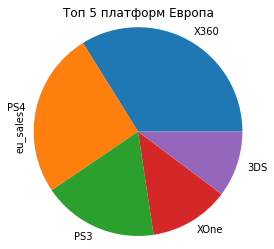

In [74]:
eu_platform.plot(kind='pie', y='eu_sales', labels=na_platform['platform'],radius=1.2,legend=False)
plt.title('Топ 5 платформ Европа')

Вот нашли топ 5 платформ, PS4, PS3, X360, XOne, 3DS.
Версии Play Station 3 и 4 в Европейском регионе в лидерах по продажам

In [75]:
eu_genre=df3.groupby('genre',as_index=False).agg({'eu_sales':'sum'})\
.sort_values(by='eu_sales',ascending=False)\
.reset_index(drop=True)
eu_genre.head()


,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


In [76]:
eu_genre=eu_genre.query('genre in ["Action","Shooter","Sports","Role-Playing","Racing"]')
eu_genre

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


Text(0.5, 1.0, 'Топ 5 жанров Европа')

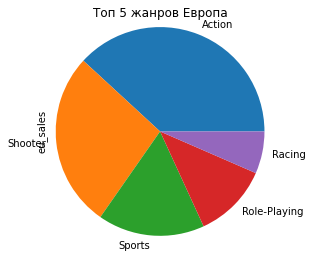

In [77]:
eu_genre.plot(kind='pie', y='eu_sales', labels=eu_genre['genre'],radius=1.2,legend=False)
plt.title('Топ 5 жанров Европа')

В Европе первые четыре жанра по продажам такие же как и в Северной Америке Action, Shooter, Sports, Role-Playing.
А вот пятую строчку занимает Racing вместо Misc в Северной Америке
В Европе также с отрывом лидируют жанры Action, Shooter


In [78]:
eu_rating=df3.groupby('rating',as_index=False).agg({'eu_sales':'mean'})\
.sort_values(by='eu_sales',ascending=False)\
.reset_index(drop=True)
eu_rating

,rating,eu_sales
0,M,0.389478
1,E,0.286152
2,E10+,0.180948
3,T,0.128544
4,Unknown,0.071765


In [79]:
eu_rating=df3.groupby('rating',as_index=False).agg({'eu_sales':'sum'})\
.sort_values(by='eu_sales',ascending=False)\
.reset_index(drop=True)
eu_rating

,rating,eu_sales
0,M,193.96
1,E,113.03
2,Unknown,91.50
3,E10+,55.37
4,T,52.96


Средние продажи при категории взрослые в Европе выше как и в Северной Америке,
почти в 2 раза по сравнению с играми с другим рейтингом
а общий объем продаж исходя из рейтинга также выше в 2 раза в категории M- взрослые

Регион JP Япония

In [80]:
df3=df.query('year_of_release > @year') # year=2011, чтобы взять актуальный период
jp_platform=df3.groupby('platform',as_index=False).agg({'jp_sales':'sum'})\
.sort_values(by='jp_sales',ascending=False)\
.reset_index(drop=True)
jp_platform.head()

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


In [81]:
jp_platform=jp_platform.query('platform in ["PSV","PS4","PS3","WiiU","3DS"]')
jp_platform

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


Text(0.5, 1.0, 'Топ 5 платформ Япония')

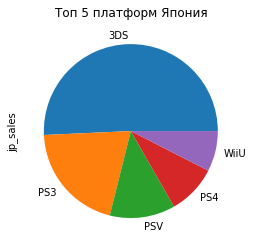

In [82]:
jp_platform.plot(kind='pie', y='jp_sales', labels=jp_platform['platform'],radius=1,legend=False)
plt.title('Топ 5 платформ Япония')

Долю рынка в Японии захватила платформа 3DS.
Эта же платформа в Северной Америке и Европе занимала только пятую строчку
а в Японии лидирует с большим отрывом

In [83]:
jp_genre=df3.groupby('genre',as_index=False).agg({'jp_sales':'sum'})\
.sort_values(by='jp_sales',ascending=False)\
.reset_index(drop=True)
jp_genre.head()

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


In [84]:
jp_genre=jp_genre.query('genre in ["Action","Misc","Simulation","Role-Playing","Fighting"]')
jp_genre

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


Text(0.5, 1.0, 'Топ 5 жанров Япония')

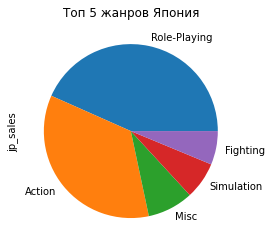

In [85]:
jp_genre.plot(kind='pie', y='jp_sales', labels=jp_genre['genre'],radius=1,legend=False)
plt.title('Топ 5 жанров Япония')

Данные по топ 5 жанрам в Японии координально отличаются от Северной Америки и Европы.
В лидерах здесь Role-Playing, котороый даже не вошел в топ Северной Америки и Европы.
Также недалеко от него жанр Action. Остальные жанры значительно отстают.
У азиатов свои вкусы как говорится)

In [86]:
jp_rating=df3.groupby('rating',as_index=False).agg({'jp_sales':'mean'})\
.sort_values(by='jp_sales',ascending=False)\
.reset_index(drop=True)
jp_rating

,rating,jp_sales
0,Unknown,0.085365
1,E,0.071722
2,T,0.063155
3,M,0.042570
4,E10+,0.026765


In [87]:
jp_rating=df3.groupby('rating',as_index=False).agg({'jp_sales':'sum'})\
.sort_values(by='jp_sales',ascending=False)\
.reset_index(drop=True)
jp_rating

,rating,jp_sales
0,Unknown,108.84
1,E,28.33
2,T,26.02
3,M,21.20
4,E10+,8.19


Средние продажи в Японии выше при рейтинге E- все пользователи и T- подростки и сумма продаж при данных
рейтингах. Однако у нас большой объем данных с пропущенным рейтингом Unknown.
А как мы знаем лидер по жанрам в Японии это Roll-Playing и скорее всего он имеет рейтинг для 
взрослой возрастной категории. Можем предположить что рейтинг у них не указан.Проверим это

In [88]:
df_role_playing=df.query('genre=="Role-Playing" ') #сделаем срез для "Role-Playing"

In [89]:
df_role_playing.rating.value_counts() # и посчитаем количество уникальных значений рейтинга для "Role-Playing"

Unknown    711
T          415
M          161
E10+       111
E           83
Name: rating, dtype: int64

Да мы в этом убедились что для жанра "Role-Playing" больше половина оценок рейтинга  ESRB это пропуски
и скорее всего в Японии будут лидировать продажи с рейтингом М- взрослые, так как жанр "Role-Playing"
больше подходит для этого рейтинга

Шаг 5. Проверьте гипотезы

H_0: Пользовательские рейтинги (user_score) жанра "Action" = Пользовательские рейтинги (user_score) жанра "Sports"`

H_a: Пользовательские рейтинги (user_score) жанра "Action" ≠ Пользовательские рейтинги (user_score) жанра "Sports"

alpha = 0.05

In [90]:
df_test=df3.dropna()
df_test.isna().sum() #уберем пропуски в срезе для проведения теста

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [91]:
action= df_test[df_test['genre'] =='Action']['user_score']
sports = df_test[df_test['genre'] == 'Sports']['user_score'] 

results=st.ttest_ind(action, sports, equal_var=False)
alpha = 0.05
print('p-value', results.pvalue)
if results.pvalue < alpha:
    print(results.pvalue,'Отвергаем нулевую гипотезу')
else:
    print(results.pvalue, 'Не получилось отвергнуть нулевую гипотезу')

p-value 5.858072645452818e-14
5.858072645452818e-14 Отвергаем нулевую гипотезу


p-value очень маленький, даже при alpha = 0.01 мы отвергаем нулевую гипотезу

H_0: Пользовательские рейтинги (user_score) платформы "Xbox One" = Пользовательские рейтинги (user_score) платформы "PC"`

H_a: Пользовательские рейтинги (user_score) платформы "Xbox One" ≠ Пользовательские рейтинги (user_score) платформы "PC"

alpha = 0.05

In [92]:
xbox_one= df_test[df_test['platform'] =='XOne']['user_score']
pc = df_test[df_test['platform'] == 'PC']['user_score'] 

results=st.ttest_ind(xbox_one, pc, equal_var=False)
alpha = 0.05
print('p-value', results.pvalue)
if results.pvalue < alpha:
    print(results.pvalue,'Отвергаем нулевую гипотезу')
else:
    print(results.pvalue, 'Не получилось отвергнуть нулевую гипотезу')

p-value 0.5926561176517491
0.5926561176517491 Не получилось отвергнуть нулевую гипотезу


Значит гипотезу то что пользовательские рейтинги (user_score) платформы "Xbox One" = пользовательские рейтинги (user_score) платформы "PC"` не получилось отвергнуть

Общий вывод:

Рассмотрел количество выпускаемых игр от года и выяснилось что начиная с 2012 года резкий спад наблюдается,а
с 2012 по 2016 года картина примерно одинаковая, поэтому эти годы брал во внимания.В эти годы по продажам выделялось 5 топовых платформ, но наиболее стабильные, без отрицательной динамики это платформы PS4,3DS и XOne.
Также выяснилось, что оценки пользователей и критиков никак напрямую не влияют на продажи,коэффициент корреляции Пуассона очень
маленький. Если рассматривать каждый регион по отдельности то данные по Европе и Северной Америки более менее похожи, это касается и топ платформ и топ предпочитаемых жанров, в основном это аркады и шутеры. В Японии доминируют же другие платформы
и жанры, платформа 3DS и жанр Roll-playing. У азиатов свои вкусы.Рейтинг ESRB на продажи в отдельном регионе на прямую никак не влияет, но различия по регионам присутствуют. Также были проверены две гипотезы. Первая то что пользовательские рейтинги (user_score) жанра "Action" = пользовательские рейтинги (user_score) жанра "Sports"`была отвергнута, а гипотезу
пользовательские рейтинги (user_score) платформы "Xbox One" = пользовательские рейтинги (user_score) платформы "PC"` не получилось отвергнуть.
